Herkese Merhaba , bu veri setinde yemeklerin hangi ülke , bölgeye ait oldukları , malzemeleri , pişirme yöntemleri , yorumlar , fiyatları ve kişilerin yemeklere göre vejeteryan durumları verilmektedir. Ben bu veri setinde gerekli değişkenleri kullanrak yemek , bölge , pişirme yöntemleri ve vejeteryan durumlarını verip bunları makine öğrenmesi ile ne kadar bir fiyat alabilirim onu tahmin etmeye çalıştım ve bunu çeşitli görselleştirme araçlarıyla uyguladım. // Hello everyone, in this dataset, the countries and regions of the dishes, their ingredients, cooking methods, comments, prices and people's vegetarian status according to the dishes are given. In this dataset, I used the necessary variables to give the dish, region, cooking methods and vegetarian status and tried to estimate how much I could get with machine learning and applied this with various visualization tools.

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

pd.set_option('display.max_columns', None)

foodDf = pd.read_csv("/DataSets/global_street_food.csv")

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency








Projemizde kullanacağımız kütüphanleri import ettiğimiz bölümdür. //
This is the section where we import the libraries we will use in our project.



Veri setimizin çalışır durumda olduğunun kontrolü için ilk 5 veriyi ekrana getiririz. //To check that our data set is working, we display the first 5 data on the screen.

In [ ]:
print(foodDf.head())

     Dish Name   Country Region/City  \
0     Takoyaki     Japan       Osaka   
1     Vada Pav     India      Mumbai   
2  Funnel Cake       USA       Texas   
3   Kathi Roll     India     Kolkata   
4     Pad Thai  Thailand     Bangkok   

                                         Ingredients  \
0  Octopus, Flour Batter, Bonito Flakes, Green On...   
1                 Potato, Spices, Bread Bun, Chutney   
2                                 Batter, Sugar, Oil   
3           Flatbread, Egg, Chicken, Onions, Chutney   
4    Rice Noodles, Tofu, Eggs, Peanuts, Bean Sprouts   

                                         Description Cooking Method  \
0  Crispy and hot, often served with sauces or ch...          Fried   
1  Crispy and hot, often served with sauces or ch...          Fried   
2  Crispy and hot, often served with sauces or ch...          Fried   
3         Charred to perfection with a smoky flavor.        Grilled   
4     Quickly tossed in a hot pan with bold flavors.     Stir-Fried

Veri setimiz hakkında bilgiler aldığımız bölümdür. Veri setimiz de 4500 veri girişi olduğu , 8 tane sütundan oluştuğu , veri tipleri olarak 1 tane float ve 7 tane object tipinde veri tipleri olduğu ve bellek kullanımı olarak 281 MB bir kullanım olduğu görülmektedir. //This is the section where we get information about our data set. It is seen that there are 4500 data entries in our data set, it consists of 8 columns, there is 1 float and 7 object data types, and there is a memory usage of 281 MB.

In [ ]:
print(foodDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dish Name            4500 non-null   object 
 1   Country              4500 non-null   object 
 2   Region/City          4500 non-null   object 
 3   Ingredients          4500 non-null   object 
 4   Description          4500 non-null   object 
 5   Cooking Method       4500 non-null   object 
 6   Typical Price (USD)  4500 non-null   float64
 7   Vegetarian           4500 non-null   object 
dtypes: float64(1), object(7)
memory usage: 281.4+ KB
None


  Sayısal değerli sütunların analizini yapmaktadır. Burada fiyat değişkenin max 5 , min 0.20 , mean(ortalama) 2 dolar ve sapma olark 1 dolar olarak gözükmektedir. // It analyzes columns with numerical values. Here, the price variable appears as max 5, min 0.20, mean 2 dollars and deviation 1 dollar.

In [ ]:
print(foodDf.describe())

       Typical Price (USD)
count          4500.000000
mean              2.657429
std               1.358311
min               0.200000
25%               1.560000
50%               2.660000
75%               3.830000
max               5.000000


Burada ilk 10 veri ve ilk 5 sütun değerlerini getirmesini istedim. // Here I wanted it to bring the first 10 data and the first 5 column values.

In [ ]:
print(foodDf.iloc[0:11,0:5])

      Dish Name   Country Region/City  \
0      Takoyaki     Japan       Osaka   
1      Vada Pav     India      Mumbai   
2   Funnel Cake       USA       Texas   
3    Kathi Roll     India     Kolkata   
4      Pad Thai  Thailand     Bangkok   
5      Vada Pav     India      Mumbai   
6     Pani Puri     India       Delhi   
7       Taiyaki     Japan       Kyoto   
8       Gözleme    Turkey      Ankara   
9       Kokoreç    Turkey       Izmir   
10    Pani Puri     India       Delhi   

                                          Ingredients  \
0   Octopus, Flour Batter, Bonito Flakes, Green On...   
1                  Potato, Spices, Bread Bun, Chutney   
2                                  Batter, Sugar, Oil   
3            Flatbread, Egg, Chicken, Onions, Chutney   
4     Rice Noodles, Tofu, Eggs, Peanuts, Bean Sprouts   
5                  Potato, Spices, Bread Bun, Chutney   
6               Semolina, Tamarind, Chickpeas, Spices   
7                               Flour, Red Bean Pas

In [ ]:
print(foodDf.loc[0:5,["Country","Region/City","Dish Name","Cooking Method"]])

    Country Region/City    Dish Name Cooking Method
0     Japan       Osaka     Takoyaki          Fried
1     India      Mumbai     Vada Pav          Fried
2       USA       Texas  Funnel Cake          Fried
3     India     Kolkata   Kathi Roll        Grilled
4  Thailand     Bangkok     Pad Thai     Stir-Fried
5     India      Mumbai     Vada Pav          Fried


Pişirme yöntemlerinin kaç çeşit olduğunu ve bunların ne kadar kullanılıdğını getirmektedir. // It brings up how many different cooking methods there are and how much they are used.

In [ ]:
print(foodDf['Cooking Method'].value_counts())

Cooking Method
Grilled           1852
Fried              718
Baked              549
Stir-Fried         513
Assembled          480
Boiled/Grilled     223
Stewed              58
Boiled              57
Pan-Fried           50
Name: count, dtype: int64


Ülke USA olan yemekleri , pişirme yöntemlerini ve fiyatlarını getirmesini istedim. // I wanted him to bring the dishes, cooking methods and prices of the country USA.

In [ ]:
print(foodDf[foodDf["Country"]=="USA"][["Dish Name","Cooking Method","Typical Price (USD)"]].head())

             Dish Name Cooking Method  Typical Price (USD)
2          Funnel Cake          Fried                 2.78
23             Hot Dog        Grilled                 3.77
36             Hot Dog        Grilled                 1.90
40         Funnel Cake          Fried                 4.11
55  Philly Cheesesteak        Grilled                 0.44


Ülke USA olan yemeklerinden kaç tane olduğunun görmekteyiz. // We see how many dishes are from the country USA.

In [ ]:
print(foodDf[foodDf["Country"]=="USA"]["Dish Name"].value_counts())

Dish Name
Hot Dog               210
Funnel Cake           206
Philly Cheesesteak    205
Name: count, dtype: int64


Ülke Tayland olan ve Vejeteryan olan kişiler için tayland yemeklerinin hangi şehirlerinde oldukları , yemekleri ve fiyatlarını getirmekteyiz. // For those who are from Thailand and are vegetarian, we bring you the cities where Thai food is served, its dishes and prices.

In [ ]:
print(foodDf[(foodDf["Vegetarian"]=="Yes") & (foodDf["Country"]=="Thailand")][["Region/City","Dish Name","Typical Price (USD)"]].head())

   Region/City     Dish Name  Typical Price (USD)
4      Bangkok      Pad Thai                 3.48
12   Ayutthaya  Roti Sai Mai                 3.68
17   Ayutthaya  Roti Sai Mai                 4.98
34     Bangkok      Pad Thai                 4.83
43     Bangkok      Pad Thai                 0.30


Yemeklerin hangi ülkeden ne kadar onu görmekteyiz. // We see how much of the food comes from which country.

In [ ]:
print(foodDf["Country"].value_counts())

Country
Japan           832
Thailand        722
India           682
Mexico          660
Turkey          650
USA             621
Lebanon         118
South Africa     58
Egypt            57
Nigeria          51
Israel           49
Name: count, dtype: int64


Boşluk kontrollü yapmaktayız. //
We do it with gap control.

In [ ]:
print(foodDf.isnull().sum())

Dish Name              0
Country                0
Region/City            0
Ingredients            0
Description            0
Cooking Method         0
Typical Price (USD)    0
Vegetarian             0
dtype: int64


In [ ]:
print(foodDf["Region/City"].value_counts())

Region/City
Osaka           287
Tokyo           278
Chiang Mai      246
Ayutthaya       241
Delhi           239
Bangkok         235
Ankara          234
Mumbai          230
Puebla          225
Guadalajara     223
Istanbul        222
Kyoto           217
Kolkata         213
Mexico City     212
New York        210
Texas           206
Philadelphia    205
Izmir           194
Beirut           62
Durban           58
Cairo            57
Tripoli          56
Lagos            51
Hiroshima        50
Tel Aviv         49
Name: count, dtype: int64


Burada makine öğrenmesi sayısal değerleri algıladığı için veri setindeki bazı değerleri sayısal değerlere çevirme işlemi yapılmaktadır. // Here, since machine learning detects numerical values, some values ​​in the data set are converted into numerical values.

In [ ]:

foodDf["Cooking Method"]=foodDf["Cooking Method"].map({"Grilled":0,"Fried":1,"Baked":2,"Stir-Fried":3,"Assembled":4,"Boiled/Grilled":5,"Stewed":6,"Boiled":7,"Pan-Fried":8})

foodDf["Dish Name"]=foodDf["Dish Name"].map({"Koshari":0,"Pani Puri":1,"Kathi Roll":2,"Vada Pav":3,"Falafel":4,"Okonomiyaki":5,"Taiyaki":6,"Takoyaki":7,"Yakisoba":8,"Shawarma":9,
                                                   "Manakish":10,"Elote":11,"Tacos al Pastor":12,"Quesadilla":13,"Suya":14,"Bunny Chow":15,"Roti Sai Mai":16,"Pad Thai":17,
                                                   "Moo Ping":18,"Gözleme":19,"Simit":20,"Kokoreç":21,"Hot Dog":22,"Philly Cheesesteak":23,"Funnel Cake":24})


foodDf["Vegetarian"]=foodDf["Vegetarian"].map({"No":0,"Yes":1})

foodDf["Region/City"]=foodDf["Region/City"].map({"Cairo":0,"Delhi":1,"Kolkata":2,"Mumbai":3,"Tel Aviv":4,"Hiroshima":5,"Kyoto":6,"Osaka":7,"Beirut":8,"Tripoli":8,"Guadalajara":9,
                                                       "Mexico City":10,"Puebla":11,"Lagos":12,"Durban":13,"Ayutthaya":14,"Bangkok":15,"Chiang Mai":16,"Ankara":17,"Istanbul":18,
                                                       "Izmir":19,"New York":20,"Philadelphia":21,"Texas":22,"Tokyo":23})



In [ ]:
print(foodDf.head())

   Dish Name  Country  Region/City  \
0          7        3            7   
1          3        1            3   
2         24        9           22   
3          2        1            2   
4         17        8           15   

                                         Ingredients  \
0  Octopus, Flour Batter, Bonito Flakes, Green On...   
1                 Potato, Spices, Bread Bun, Chutney   
2                                 Batter, Sugar, Oil   
3           Flatbread, Egg, Chicken, Onions, Chutney   
4    Rice Noodles, Tofu, Eggs, Peanuts, Bean Sprouts   

                                         Description Cooking Method  \
0  Crispy and hot, often served with sauces or ch...          Fried   
1  Crispy and hot, often served with sauces or ch...          Fried   
2  Crispy and hot, often served with sauces or ch...          Fried   
3         Charred to perfection with a smoky flavor.        Grilled   
4     Quickly tossed in a hot pan with bold flavors.     Stir-Fried   

   Typi

Makine Öğrenmesi Modeli //
Machine Learning Model

Makine öğrenmesi modeli hazırlığında veri setimizde bazı kullanmayacağımız sütunları silme işlemi yapmaktayız. // In preparation for the machine learning model, we delete some columns that we will not use in our data set.

In [ ]:
foodDf = foodDf.drop(["Typical Price (USD)","Ingredients","Description","Country"],axis=1)

In [ ]:
print(foodDf.tail())

      Dish Name  Country  Region/City  Vegetarian
4495          0        0            0           1
4496          0        0            0           1
4497          0        0            0           1
4498          0        0            0           1
4499         14        6           12           0


Bağımsız değişkenlerimizi atama yaptık. // We assigned our independent variables.

In [ ]:
X = foodDf

Bağımlı değişkenimizi atama yaptık. //
We assigned our dependent variable.

In [ ]:
y = foodDf["Typical Price (USD)"]

In [ ]:
print(y.head())

0    3.28
1    2.37
2    2.78
3    1.89
4    3.48
Name: Typical Price (USD), dtype: float64


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
model = RandomForestRegressor(
    n_estimators=100,         # Ağaç sayısı
    max_depth=10,             # Maksimum derinlik
    min_samples_split=5,      # Düğüm bölmek için minimum örnek sayısı
    min_samples_leaf=2,       # Yaprakta bulunması gereken minimum örnek sayısı
    random_state=42
)


Öğretme işlemi yapmaktadır. // It is a teaching process.

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

Tahminleme. //
Guessing.

In [ ]:
y_pred = model.predict(X_test) #Tahminleme...


In [ ]:
print(y_pred)

[2.46417741 2.49459371 2.49459371 ... 2.51585286 2.37383817 2.51585286]


Model Değerlendirme. // Model Evaluation.

In [ ]:
r2 = r2_score(y_test,y_pred)

mae = mean_squared_error(y_test,y_pred)


In [ ]:
print("R2 : ",r2)

print("MAE : ",mae)


R2 :  0.08427934650130553
MAE :  1.6342363857015765


Tahmin. //
Guess

In [ ]:

tahminDegerler = pd.DataFrame({
    "Dish Name":[8],
    "Region/City":[3],
    "Cooking Method":[5],
    "Vegetarian":[1]
})


tahmin = model.predict(tahminDegerler)

print("Tahmin : ",tahmin)




Tahmin :  [3.04763691]


Görselleştirme // visualization

Burada şehirleri ve yemekleri gruplayarak bunların fiyatlarının ortalamasını aldım ve bunları sütunlarla görselleştirdim. //
Here I grouped cities and dishes, averaged their prices, and visualized them with columns.

In [ ]:
ortalamaFiyat = foodDf.groupby(["Region/City","Dish Name"]).agg({"Typical Price (USD)":"mean"}).sort_values(by="Typical Price (USD)",ascending=False)

<Figure size 1000x600 with 0 Axes>

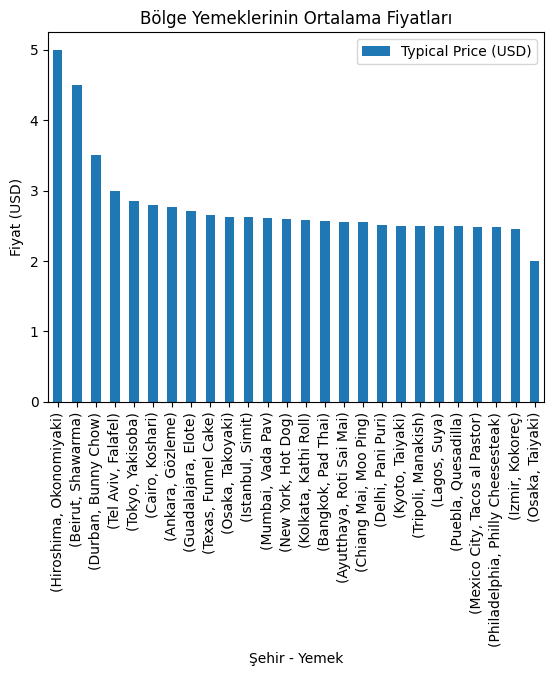

In [ ]:
plt.figure(figsize=(10,6))

ortalamaFiyat.plot(kind="bar")

plt.xlabel("Şehir - Yemek")

plt.ylabel("Fiyat (USD)")

plt.title("Bölge Yemeklerinin Ortalama Fiyatları")

plt.show()

Fiyat Dağılımlarını görmekteyiz. //
We see the Price Distributions.

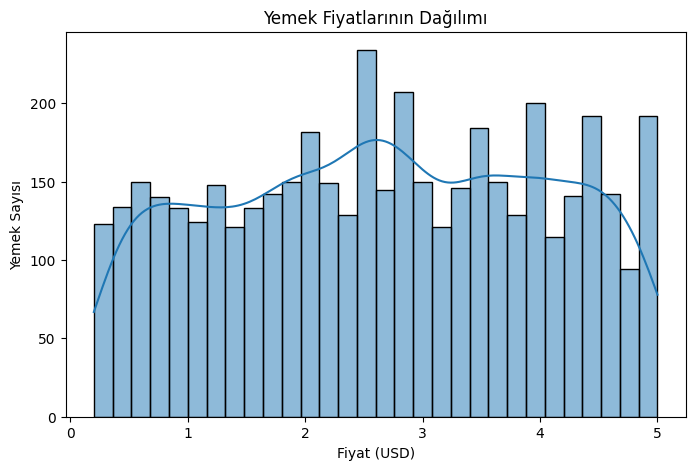

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(foodDf["Typical Price (USD)"], bins=30, kde=True)
plt.title("Yemek Fiyatlarının Dağılımı")
plt.xlabel("Fiyat (USD)")
plt.ylabel("Yemek Sayısı")
plt.show()


In [ ]:
print(foodDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dish Name            4500 non-null   object 
 1   Country              4500 non-null   object 
 2   Region/City          4500 non-null   object 
 3   Ingredients          4500 non-null   object 
 4   Description          4500 non-null   object 
 5   Cooking Method       4500 non-null   object 
 6   Typical Price (USD)  4500 non-null   float64
 7   Vegetarian           4500 non-null   object 
dtypes: float64(1), object(7)
memory usage: 281.4+ KB
None


In [ ]:
sehir_fiyat=foodDf.groupby("Region/City")["Typical Price (USD)"].mean()

In [ ]:
print(sehir_fiyat.reset_index())

     Region/City  Typical Price (USD)
0         Ankara             2.763034
1      Ayutthaya             2.554481
2        Bangkok             2.563362
3         Beirut             4.500000
4          Cairo             2.800000
5     Chiang Mai             2.548577
6          Delhi             2.512259
7         Durban             3.500000
8    Guadalajara             2.713184
9      Hiroshima             5.000000
10      Istanbul             2.620946
11         Izmir             2.452526
12       Kolkata             2.586103
13         Kyoto             2.500645
14         Lagos             2.500000
15   Mexico City             2.483632
16        Mumbai             2.618304
17      New York             2.594381
18         Osaka             2.506132
19  Philadelphia             2.482683
20        Puebla             2.497422
21      Tel Aviv             3.000000
22         Texas             2.658350
23         Tokyo             2.852194
24       Tripoli             2.500000


Şehirlere ortalama yemek fiyatlarını görmekteyiz. // We see the average food prices for the cities.

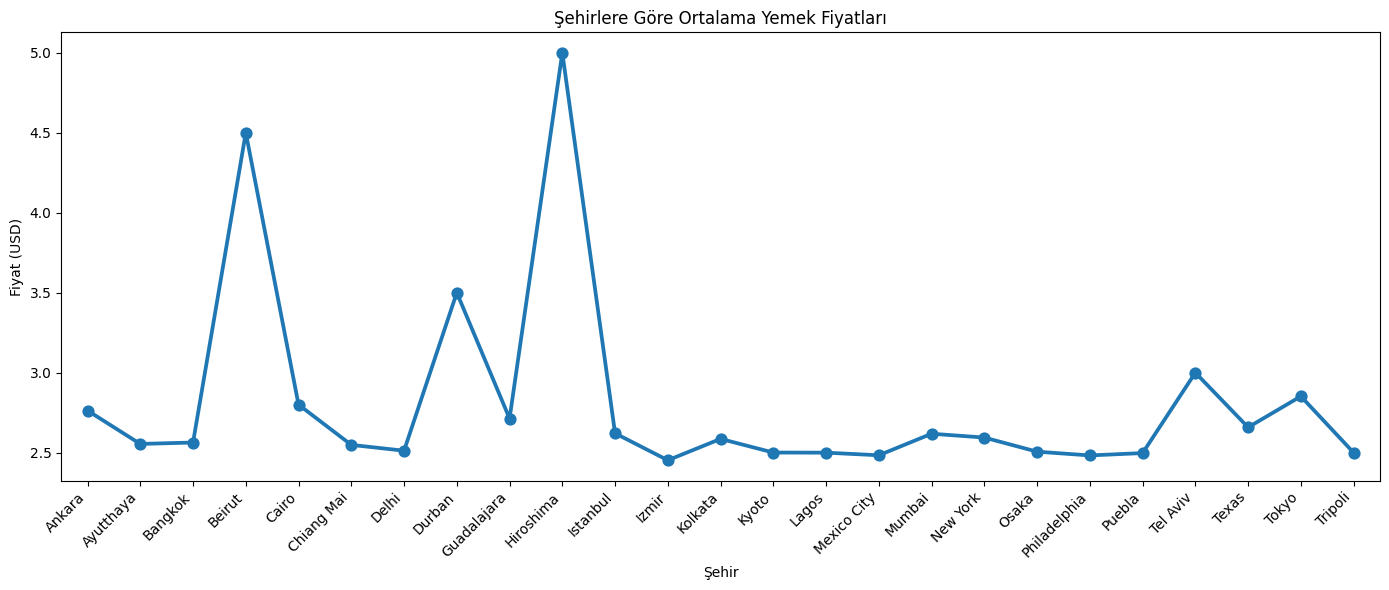

In [ ]:
plt.figure(figsize=(14, 6))
#(14, 6) demek: grafiğin yatayda 14 birim, dikeyde 6 birim olmasıdır.
sns.pointplot(x=sehir_fiyat.index, y=sehir_fiyat.values)
plt.xticks(rotation=45, ha='right')  # X etiketlerini döndürerek okunabilirlik artır
#Etiketleri 45 derece döndürür. Bu, şehir isimleri uzun olduğunda üst üste binmesini engeller.
#ha='right' → ha yani horizontal alignment, etiketi sağa hizalar. Görsel olarak daha düzenli durur.
plt.title("Şehirlere Göre Ortalama Yemek Fiyatları")
plt.xlabel("Şehir")
plt.ylabel("Fiyat (USD)")
plt.tight_layout()
#Bu komut, grafiğin kenar boşluklarını otomatik olarak ayarlar.
plt.show()


Burada her yemeğin ne kadar bir malzeme içerdiğini görmekteyiz. // Here we see how much of an ingredient each dish contains

In [ ]:
foodDf['Num_Ingredients'] = foodDf['Ingredients'].apply(lambda x: len(str(x).split(',')))


In [ ]:
print(foodDf["Num_Ingredients"].values.max())

5


In [ ]:
print(foodDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dish Name            4500 non-null   object 
 1   Country              4500 non-null   object 
 2   Region/City          4500 non-null   object 
 3   Ingredients          4500 non-null   object 
 4   Description          4500 non-null   object 
 5   Cooking Method       4500 non-null   object 
 6   Typical Price (USD)  4500 non-null   float64
 7   Vegetarian           4500 non-null   object 
 8   Num_Ingredients      4500 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 316.5+ KB
None


Malzemelerin içinde chesse geçen yemeklerin ortalama fiyatları. //
Average prices of dishes containing chesse in their ingredients.

In [ ]:
# Örneğin "cheese" içeren yemeklerin ortalama fiyatı
cheese_foods = foodDf[foodDf["Ingredients"].str.contains("cheese", case=False, na=False)]
cheese_mean = cheese_foods["Typical Price (USD)"].mean()

print("Cheese içeren yemeklerin ortalama fiyatı:", round(cheese_mean, 2))


Cheese içeren yemeklerin ortalama fiyatı: 2.62


Yorumlar sütunundan yola çıkarak bir tat profili sütunu oluşturmaktayız. // We create a taste profile column based on the comments column.

In [ ]:
def get_flavor_profile(desc):
    desc = desc.lower()
    if any(word in desc for word in ['spicy', 'bold']):
        return 'Spicy'
    elif any(word in desc for word in ['sweet', 'dessert', 'red bean']):
        return 'Sweet'
    elif 'savory' in desc:
        return 'Savory'
    elif 'smoky' in desc:
        return 'Smoky'
    elif any(word in desc for word in ['sour', 'tangy', 'chutney']):
        return 'Tangy'
    else:
        return 'Unknown'

foodDf['Flavor_Profile'] = foodDf['Description'].apply(get_flavor_profile)


In [ ]:
print(foodDf[foodDf["Flavor_Profile"]=="Unknown"].count())

Dish Name              1430
Country                1430
Region/City            1430
Ingredients            1430
Description            1430
Cooking Method         1430
Typical Price (USD)    1430
Vegetarian             1430
Flavor_Profile         1430
dtype: int64


In [ ]:
df_new = pd.crosstab(foodDf['Region/City'], foodDf['Flavor_Profile'])
print(df_new)


Flavor_Profile  Savory  Smoky  Spicy  Sweet  Tangy  Unknown
Region/City                                                
Ankara               0    234      0      0      0        0
Ayutthaya            0      0      0      0      0      241
Bangkok              0      0    235      0      0        0
Beirut               0      0      0      0      0       62
Cairo                0      0     57      0      0        0
Chiang Mai           0    246      0      0      0        0
Delhi                0      0      0      0      0      239
Durban               0      0      0      0      0       58
Guadalajara          0      0      0      0      0      223
Hiroshima           50      0      0      0      0        0
Istanbul             0      0      0      0      0      222
Izmir                0    194      0      0      0        0
Kolkata              0    213      0      0      0        0
Kyoto                0      0      0      0      0      217
Lagos                0      0     51    

Şehirlere göre tat profillerin sayılarını görmekteyiz. // We see the numbers of taste profiles by city.

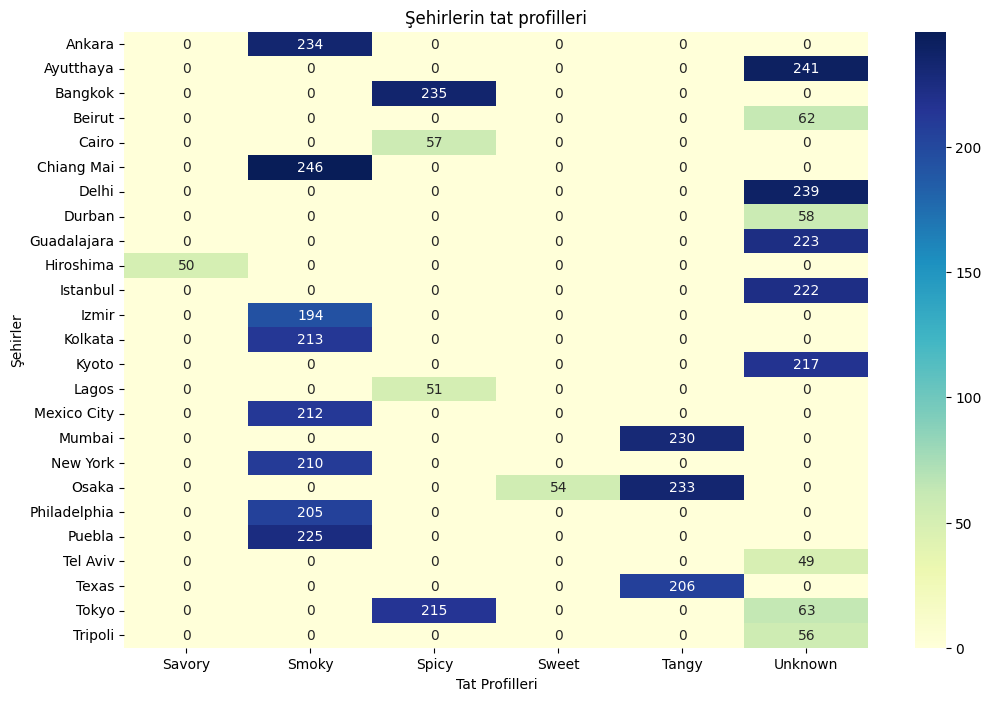

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_new, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Şehirlerin tat profilleri')
plt.ylabel('Şehirler')
plt.xlabel('Tat Profilleri')
plt.show()